In [1]:
from pathlib import Path

import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import laplace
%matplotlib inline

In [2]:
def laplace_multiplicand(fileID, band):
    fires = io.imread(fileID);
    firstChannel = np.squeeze(fires[:,:,0])
    height, width = firstChannel.shape
    smallFires = resize(firstChannel, (round(height/2), round(width/2)))*255
    blurryFires = resize(smallFires, (height, width))
    details = firstChannel - blurryFires
    laplace_edges = laplace(blurryFires)
    
    table = []
    amount = 0
    while amount <= 1:
        sharped_image = blurryFires+laplace_edges * amount
        abs_error = abs(firstChannel-sharped_image)
        mean = abs_error.mean()
        sqrt = np.sqrt(((details- laplace_edges * amount)**2).mean())
        table.append({'Filename': fileID,'Band': band,'Multiplicand': amount, 'Mean Error': mean, 'Square Root': sqrt})
        amount = amount + .1
    
    return pd.DataFrame(table)

In [3]:
laplace_multiplicand('TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif','07')

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.0,1.699231,2.378094
1,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.1,1.649318,2.294962
2,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.2,1.607010,2.224321
3,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.3,1.573478,2.167394
4,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.4,1.549572,2.125283
5,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.5,1.535613,2.098881
6,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.6,1.531609,2.088781
7,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.7,1.537398,2.095222
8,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.8,1.552775,2.118050
9,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.9,1.576942,2.156747


In [4]:
# creates a table out of all the c14 files
dfc14 = pd.concat((laplace_multiplicand(file, '14') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C14*')))

In [5]:
#creates a table out of all the c07 files
dfc07 = pd.concat((laplace_multiplicand(file, '07') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C07*')))

In [6]:
df_all = pd.concat([dfc14, dfc07])

In [7]:
df_all

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.0,1.993900,2.937043
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.1,1.934093,2.832672
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.2,1.883747,2.745723
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.3,1.844548,2.677895
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.4,1.817810,2.630667
...,...,...,...,...,...
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.6,1.414960,1.872903
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.7,1.417593,1.872865
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.8,1.428059,1.885348
9,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.9,1.445897,1.910108


Text(0.5, 1.0, 'Mean Error')

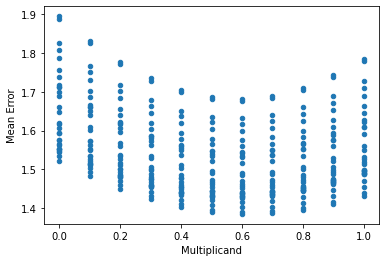

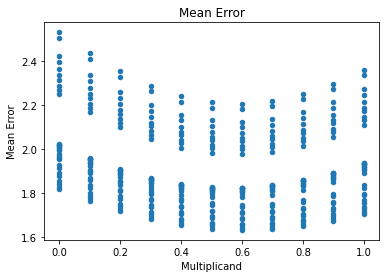

In [8]:
#extra scatterplot
df = df_all
df.groupby('Band').plot.scatter('Multiplicand','Mean Error')
#plt.legend(['Band 7', 'Band 14'], frameon = False, )
plt.title('Mean Error')

In [9]:
#ignore
df.groupby('Band').min()

,Filename,Multiplicand,Mean Error,Square Root
Band,,,,
07,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,0.0,1.385556,1.800776
14,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,0.0,1.631077,2.284384


In [10]:
#ignore
df.groupby('Filename').min()

,Band,Multiplicand,Mean Error,Square Root
Filename,,,,
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif,07,0.0,1.531609,2.088781
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_171218_cali.tif,07,0.0,1.542998,2.112727
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_172218_cali.tif,07,0.0,1.544466,2.112583
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_173218_cali.tif,07,0.0,1.560063,2.133605
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_174218_cali.tif,07,0.0,1.575545,2.161295
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_175218_cali.tif,07,0.0,1.600057,2.206434
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_180218_cali.tif,07,0.0,1.616997,2.226605
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_181218_cali.tif,07,0.0,1.632594,2.262350
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_183218_cali.tif,07,0.0,1.681729,2.337601


In [11]:
#scatterplot that was wrong :)
df = df_file_min
df.groupby('Band').plot.scatter('Multiplicand','Mean Error')

NameError: name 'df_file_min' is not defined

In [12]:
#the correct dataframe!!
df = df_all
df.groupby(['Band', 'Multiplicand']).mean().reset_index()

,Band,Multiplicand,Mean Error,Square Root
0,07,0.0,1.654863,2.291633
1,07,0.1,1.608058,2.214689
2,07,0.2,1.568417,2.149217
3,07,0.3,1.536881,2.096297
4,07,0.4,1.514199,2.056904
5,07,0.5,1.500714,2.031828
6,07,0.6,1.496526,2.021605
7,07,0.7,1.501503,2.026458
8,07,0.8,1.515250,2.046277
9,07,0.9,1.537186,2.080628


In [14]:
df7 = (df[df["Band"]=="07"])
df14 = df[df["Band"]=="14"]

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.0,1.993900,2.937043
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.1,1.934093,2.832672
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.2,1.883747,2.745723
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.3,1.844548,2.677895
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.4,1.817810,2.630667
...,...,...,...,...,...
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.6,2.011036,2.972018
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.7,2.022125,2.987309
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.8,2.048889,3.029620
9,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.9,2.090102,3.097842


Text(0, 0.5, 'Mean Error')

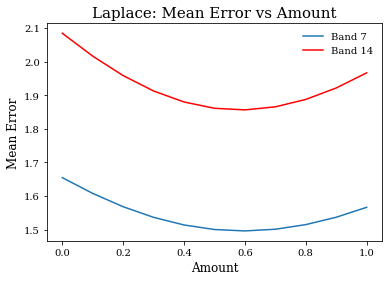

In [70]:
ax = df7.groupby(['Multiplicand']).mean().reset_index().plot('Multiplicand','Mean Error')
df14.groupby(['Multiplicand']).mean().reset_index().plot('Multiplicand','Mean Error',color = 'red',ax = ax)
plt.xlabel("Amount",fontname = 'serif',fontsize = 12)
plt.title('Laplace: Mean Error vs Amount',fontsize = 15,fontname = 'serif')
plt.legend(['Band 7','Band 14'],frameon = False)
plt.rc('font',family='serif')
plt.ylabel('Mean Error',fontname = 'serif',fontsize = 12)